In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# to remove or ignore the warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
credit_df = pd.read_csv('Data/creditcard.csv')

In [5]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_df.shape

(284807, 31)

In [8]:
# check information about columns

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
print("\nColumns with missing value\n") 
print(credit_df.isnull().any())


Columns with missing value

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [10]:
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
# check no of classes

credit_df.Class.unique()

array([0, 1])

In [12]:
# '''
# o non-fraud transaction
# 1 fraud transaction
# '''

In [13]:
# count samples based on labels

credit_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
# by looking values above dataset is imbalanced

credit_df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

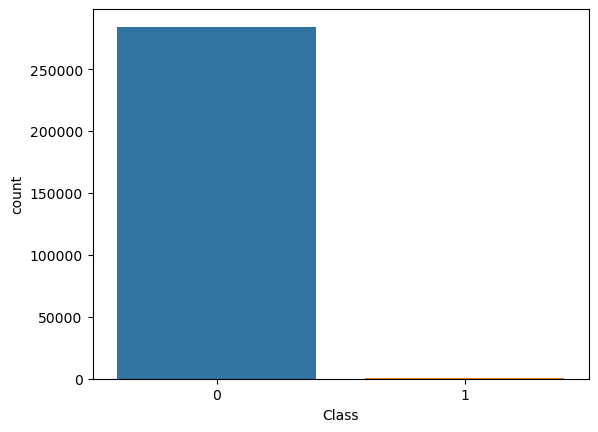

In [15]:
sns.countplot(credit_df.Class)
plt.show()

In [16]:
# drop Time and Amount columns

credit_df_1=credit_df.drop(['Time','Amount'],axis=1)

In [17]:
# split the data x(features) and y(labels)

x=credit_df_1.drop('Class',axis=1)
y=credit_df_1['Class']

In [18]:
# splitting x and y into training testing sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227845, 28), (56962, 28), (227845,), (56962,))

In [20]:
# create logisting model

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [21]:
# score for training set

y_train_pred = log_model.predict(x_train)
train_score = accuracy_score(y_train, y_train_pred)
print('Training Set Score : ', train_score)

# score for testing set

y_test_pred = log_model.predict(x_test)
test_score = accuracy_score(y_test, y_test_pred)
print('Testing Set score : ', test_score)

Training Set Score :  0.999188044503939
Testing Set score :  0.9992099996488887


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 [Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')],
 [Text(0, 0.5, 'Non-Fraud'), Text(0, 1.5, 'Fraud')]]

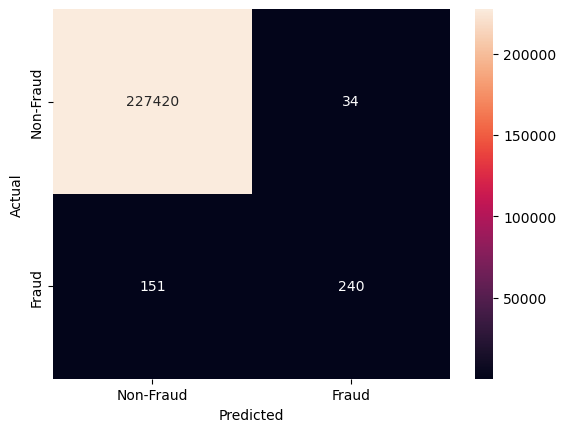

In [22]:
# Confustion Matrix for training set

train_cm = confusion_matrix(y_train, y_train_pred)
# print(train_cm)
ticks = ['Non-Fraud', 'Fraud']
sns.heatmap(train_cm, annot=True, fmt='').set(xlabel='Predicted', ylabel='Actual', xticklabels=ticks, yticklabels=ticks)


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 [Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')],
 [Text(0, 0.5, 'Non-Fraud'), Text(0, 1.5, 'Fraud')]]

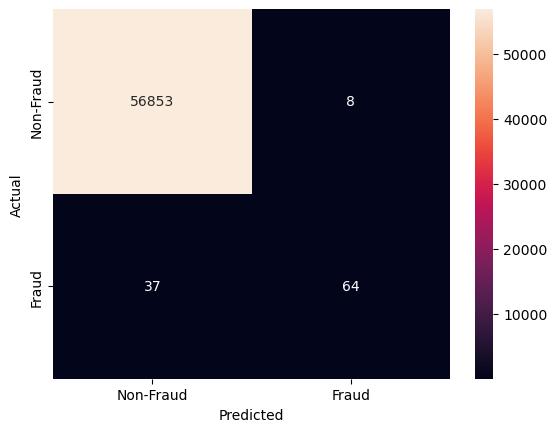

In [23]:
# Confustion Matrix for testing set

test_cm = confusion_matrix(y_test, y_test_pred)
# print(train_cm)
ticks = ['Non-Fraud', 'Fraud']
sns.heatmap(test_cm, annot=True, fmt='').set(xlabel='Predicted', ylabel='Actual', xticklabels=ticks, yticklabels=ticks)


In [24]:
# precision for training set
# y_train_pred = log_model.predict(x_train)
train_precision = precision_score(y_train, y_train_pred)
print('Training Set Precision : ', train_precision)

# precision for testing set
# y_test_pred = log_model.predict(x_test)
test_precision = precision_score(y_test, y_test_pred)
print('Testing Set Precision : ', test_precision)

Training Set Precision :  0.8759124087591241
Testing Set Precision :  0.8888888888888888


In [25]:
# recall for training set
# y_train_pred = log_model.predict(x_train)
train_recall = recall_score(y_train, y_train_pred)
print('Training Set Recall : ', train_recall)

# recall for testing set
# y_test_pred = log_model.predict(x_test)
test_recall = recall_score(y_test, y_test_pred)
print('Testing Set Recall : ', test_recall)

Training Set Recall :  0.6138107416879796
Testing Set Recall :  0.6336633663366337


In [26]:
# f1-score for training set
# y_train_pred = log_model.predict(x_train)
train_f1 = f1_score(y_train, y_train_pred)
print('Training Set F1 : ', train_f1)

# recall for testing set
# y_test_pred = log_model.predict(x_test)
test_f1 = f1_score(y_test, y_test_pred)
print('Testing Set F1 : ', test_f1)

Training Set F1 :  0.7218045112781954
Testing Set F1 :  0.7398843930635838


In [27]:
#define a function to return all classification metrics (score, precision, recall, f1, cm) by passing model object as parameter

def get_metrics(model):
    '''
    '''
    score = 0
    precision = 0
    recall = 0
    f1 = 0
    cm = []
    
    return {'score':score, 'precision':precision, 'recall':recall, 'f1':f1, 'cm':cm}
    

In [28]:
model_dict = get_metrics(log_model)

In [29]:
model_dict['score']

0

In [30]:
# under sampling

from imblearn.under_sampling import NearMiss

near_miss = NearMiss()

x_us, y_us = near_miss.fit_resample(x, y)


In [31]:
x_us.shape

(984, 28)

In [32]:
x.shape

(284807, 28)

In [33]:
y_us.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [34]:
# logistic model on under sampling dataset

x_train, x_test, y_train, y_test = train_test_split(x_us, y_us, test_size=0.2, random_state=0)
log_model1 = LogisticRegression()
log_model1.fit(x_train, y_train)

y_train_pred = log_model1.predict(x_train)
y_test_pred = log_model1.predict(x_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)
print(f'Score: Train={train_score} & Test={test_score}')

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f'F1: Train={train_f1} & Test={test_f1}')

train_p = precision_score(y_train, y_train_pred)
test_p = precision_score(y_test, y_test_pred)
print(f'Precision: Train={train_p} & Test={test_p}')

train_r = recall_score(y_train, y_train_pred)
test_r = recall_score(y_test, y_test_pred)
print(f'Recall: Train={train_r} & Test={test_r}')

Score: Train=0.963151207115629 & Test=0.9593908629441624
F1: Train=0.96158940397351 & Test=0.9615384615384616
Precision: Train=0.983739837398374 & Test=0.9803921568627451
Recall: Train=0.9404145077720207 & Test=0.9433962264150944


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 [Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')],
 [Text(0, 0.5, 'Non-Fraud'), Text(0, 1.5, 'Fraud')]]

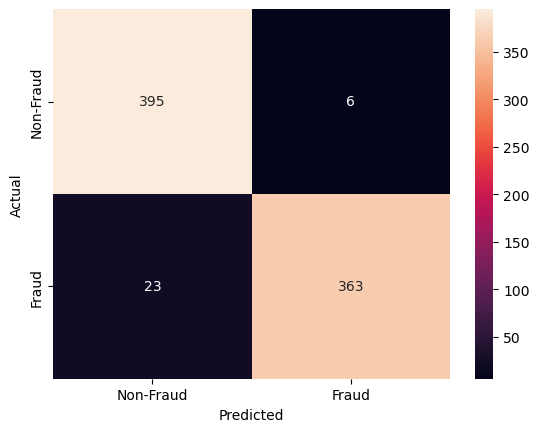

In [35]:
# Confustion Matrix for training set

train_cm = confusion_matrix(y_train, y_train_pred)
ticks = ['Non-Fraud', 'Fraud']
sns.heatmap(train_cm, annot=True, fmt='').set(xlabel='Predicted', ylabel='Actual', xticklabels=ticks, yticklabels=ticks)

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 [Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')],
 [Text(0, 0.5, 'Non-Fraud'), Text(0, 1.5, 'Fraud')]]

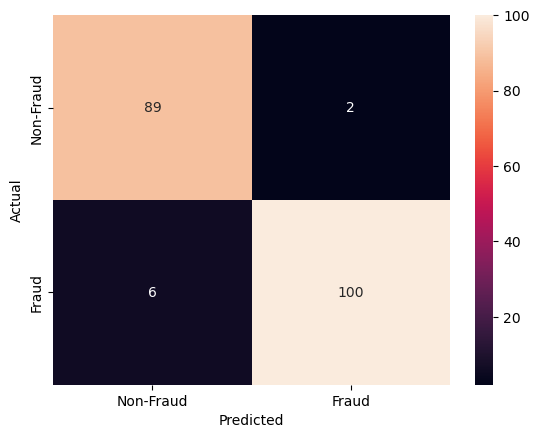

In [36]:
# Confustion Matrix for testing set

test_cm = confusion_matrix(y_test, y_test_pred)
ticks = ['Non-Fraud', 'Fraud']
sns.heatmap(test_cm, annot=True, fmt='').set(xlabel='Predicted', ylabel='Actual', xticklabels=ticks, yticklabels=ticks)

In [37]:
# over sampling

from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_os, y_os = smote.fit_resample(x, y)

In [38]:
y_os.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [39]:
def evaluate_model(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    print(f'Score: Train={train_score} & Test={test_score}')

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    print(f'F1: Train={train_f1} & Test={test_f1}')

    train_p = precision_score(y_train, y_train_pred)
    test_p = precision_score(y_test, y_test_pred)
    print(f'Precision: Train={train_p} & Test={test_p}')

    train_r = recall_score(y_train, y_train_pred)
    test_r = recall_score(y_test, y_test_pred)
    print(f'Recall: Train={train_r} & Test={test_r}')

In [40]:
evaluate_model(LogisticRegression(), x_os, y_os)

Score: Train=0.944832316268927 & Test=0.9439178376096935
F1: Train=0.9430547487656114 & Test=0.9422334933429943
Precision: Train=0.9738180148178696 & Test=0.9739364889155183
Recall: Train=0.9141756080822478 & Test=0.9125293849338619


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
evaluate_model(DecisionTreeClassifier(), x_us, y_us)

Score: Train=1.0 & Test=0.934010152284264
F1: Train=1.0 & Test=0.9377990430622011
Precision: Train=1.0 & Test=0.9514563106796117
Recall: Train=1.0 & Test=0.9245283018867925
